___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


## Introduction

The ultimate goal of this project is to create a model that predicts the value of a used auto. That's why we will clean and prepare the data accordingly. 

As part of domain knowledge research, we have gone through a few articles that focus on the factors that are important for the resale value of a used auto:

   - ... In brief, the main factors affecting a used vehicle's price are mileage and condition. Options, location, and color also playing a role. Personalizing cars can hurt value.
   - ... Mileage, wear and tear, both outside and in, and mechanical condition.
   - ... Appearance, mileage, brand and model, age, ownership
   - ... Economic factors, brand, class and body style, mileage, transmission type, exterior condition, interior condition, mechanical wear and tear and maintenance history, accident history, aftermarket parts and modifications, technology, color. https://www.moneycrashers.com/factors-affect-used-cars-resale-value/
    
These highlighted features and some others ideally need to be included in our data set so as to train a powerful predictive ML model at the end. We will import and analyse the data, keep and transform valuable features, and get rid of all others with no value.

Ideally at this stage, we must discuss with the business users to understand how they plan to use the predictive model and what features they want to enter to make a prediction. If we drop a feature that was supposed to be used during prediction, we would have created a model not fit for the purpose. Communication is key to avoid such problems.

## Data Cleaning

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200) 

We import the json formatted data and name it *raw_df*.

In [3]:
raw_df = pd.read_json ("scout_car.json", lines = True)

Look at the shape, column names, and a few rows of the data.

In [4]:
raw_df.shape

(15919, 54)

In [5]:
raw_df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [6]:
# rename four columns for proper format
raw_df.rename(columns={"\nComfort & Convenience\n": "Comfort & Convenience", 
                       "\nEntertainment & Media\n": "Entertainment & Media",
                       "\nExtras\n": "Extras",
                       "\nSafety & Security\n": "Safety & Security"}, inplace=True)

In [7]:
raw_df.head() 

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (c

As seen above, the data in many columns are messy, needs significant re-formatting, cleaning, transformation, and encoding.

How much missing data (in percentage) do we have in each column?

In [8]:
raw_df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

kW                               100.00
Last Timing Belt Service Date     99.90
Electricity consumption           99.14
Available from                    98.29
Last Service Date                 96.44
Availability                      96.01
Other Fuel Types                  94.47
Next Inspection                   77.79
Inspection new                    75.30
Emission Label                    74.97
Model Code                        68.73
Non-smoking Vehicle               54.92
Country version                   52.35
Full Service                      48.39
Weight                            43.81
Drive chain                       43.08
prev_owner                        42.89
Previous Owners                   41.71
Paint Type                        36.26
Cylinders                         35.68
Warranty                          34.05
Gears                             29.60
vat                               28.35
Body Color Original               23.61
Upholstery                        23.37


#### Create a new empty data frame

In [9]:
data = pd.DataFrame()

#### Handling the dependent variable *price*

In [10]:
temp = raw_df["price"].copy()

In [11]:
temp.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [12]:
temp.isnull().sum()

0

In [13]:
data["price"] = temp

In [14]:
data.head()

,price
0,15770
1,14500
2,14640
3,14500
4,16790


#### Handling the independent variables *make*

In [15]:
temp = raw_df["Make"].copy()

In [16]:
temp[-5:]

15914    \nRenault\n
15915    \nRenault\n
15916    \nRenault\n
15917    \nRenault\n
15918    \nRenault\n
Name: Make, dtype: object

In [17]:
data["make"] = temp.apply(lambda row: row.replace("\n", ""))

In [18]:
data["make"].value_counts()

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

#### Handling the independent variables *model*

In [19]:
temp = raw_df["Model"].copy()

In [20]:
temp.isnull().sum()

0

In [21]:
temp[-5:]

15914    [\n, Espace, \n]
15915    [\n, Espace, \n]
15916    [\n, Espace, \n]
15917    [\n, Espace, \n]
15918    [\n, Espace, \n]
Name: Model, dtype: object

In [22]:
data["model"] = temp.apply(lambda row: row[1])

In [23]:
data["model"].value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

#### Handling the independent variable *make_model*

In [24]:
raw_df.drop(columns="make_model", axis=1, inplace=True) # to be dropped because it is redundant
raw_df.shape

(15919, 53)

In [25]:
data.groupby(["make", "model"])["price"].mean()

make     model   
Audi     A1          18864.688982
         A2          28200.000000
         A3          20996.693252
Opel     Astra       15834.663895
         Corsa       11047.095539
         Insignia    21463.451886
Renault  Clio        11940.320827
         Duster      13230.176471
         Espace      30080.211907
Name: price, dtype: float64

In [26]:
data.groupby(["model"]).count()

,price,make
model,,
A1,2614,2614
A2,1,1
A3,3097,3097
Astra,2526,2526
Clio,1839,1839
Corsa,2219,2219
Duster,34,34
Espace,991,991
Insignia,2598,2598


In [27]:
data[data.model == "A2"]

,price,make,model
2614,28200,Audi,A2


In [28]:
data = data[data.model != "A2"]
data.shape

(15918, 3)

In [29]:
raw_df.drop(raw_df.index[2614], axis=0, inplace=True)
raw_df.shape

(15918, 53)

#### Handling the independent variable *km*

In [30]:
temp = raw_df["km"].copy()

In [31]:
temp[0]

'56,013 km'

In [32]:
def get_mileage(km):
    return ''.join(re.findall("[0-9]", km))

In [33]:
re.findall("[0-9]", '56,013 km')

['5', '6', '0', '1', '3']

In [34]:
get_mileage('56,013 km')

'56013'

In [35]:
data["mileage"] = temp.apply(lambda row: get_mileage(row))

In [36]:
data.head()

,price,make,model,mileage
0,15770,Audi,A1,56013
1,14500,Audi,A1,80000
2,14640,Audi,A1,83450
3,14500,Audi,A1,73000
4,16790,Audi,A1,16200


In [37]:
data.isnull().sum()

price      0
make       0
model      0
mileage    0
dtype: int64

In [38]:
data["mileage"].isnull().sum()

0

In [39]:
data[data.mileage == '']

,price,make,model,mileage
743,25900,Audi,A1,
869,21300,Audi,A1,
946,21406,Audi,A1,
977,21200,Audi,A1,
980,21100,Audi,A1,
...,...,...,...,...
15890,42490,Renault,Espace,
15902,41043,Renault,Espace,
15912,39950,Renault,Espace,
15914,39950,Renault,Espace,


In [40]:
data[data.mileage == ''].groupby(["make", "model"])["price"].mean()

make     model   
Audi     A1          23872.329167
         A3          24524.433121
Opel     Astra       20010.666667
         Corsa       13262.138889
         Insignia    29265.736402
Renault  Clio        12014.301075
         Duster      13129.888889
         Espace      37609.959184
Name: price, dtype: float64

In [41]:
data.groupby(["make", "model"])["price"].mean()

make     model   
Audi     A1          18864.688982
         A3          20996.693252
Opel     Astra       15834.663895
         Corsa       11047.095539
         Insignia    21463.451886
Renault  Clio        11940.320827
         Duster      13230.176471
         Espace      30080.211907
Name: price, dtype: float64

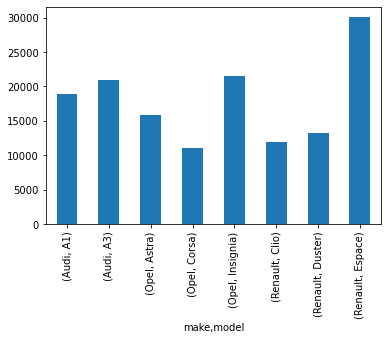

In [42]:
data.groupby(["make", "model"])["price"].mean().plot(kind="bar");

It is clear that the average price for those autos with no km information are much higher than those make/model autos on average. That means these are possibly newer autos with 0 km, maybe unused? For the time being we will impute missing values with 0. What else can be done? We may look at their first_registration date. If their first_registration date is 2019 or NaN, we may safely assume 0 km. Or, we can impute them based on average km per age?

In [43]:
#data.loc[data["mileage"] == '', "mileage"] = 0
data["mileage"] = data["mileage"].apply(lambda row: 0 if row == "" else row)

In [44]:
data[data.mileage == '']

,price,make,model,mileage


In [45]:
data["mileage"] = data["mileage"].astype(int)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15918 entries, 0 to 15918
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    15918 non-null  int64 
 1   make     15918 non-null  object
 2   model    15918 non-null  object
 3   mileage  15918 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 621.8+ KB


In [47]:
data.head()

,price,make,model,mileage
0,15770,Audi,A1,56013
1,14500,Audi,A1,80000
2,14640,Audi,A1,83450
3,14500,Audi,A1,73000
4,16790,Audi,A1,16200


In [48]:
data.describe()

,price,mileage
count,15918.000000,15918.000000
mean,18019.257193,31935.047619
std,7385.960648,37090.278586
min,13.000000,0.000000
25%,12850.000000,1553.750000
50%,16900.000000,20397.000000
75%,21900.000000,46899.250000
max,74600.000000,317000.000000


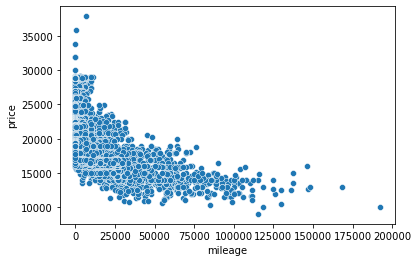

In [49]:
data_new = data[(data.make == "Audi") & (data.model == "A1")]
sns.scatterplot(x="mileage", y="price", data=data_new);

#### Handling the independent variable *registration*

In [50]:
temp = raw_df["registration"].copy()

In [51]:
temp.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      96
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [52]:
temp[0]

'01/2016'

In [53]:
temp.isnull().sum()

0

In [54]:
data["first_registration"] = temp.str[-4:]

In [55]:
data.head()

,price,make,model,mileage,first_registration
0,15770,Audi,A1,56013,2016
1,14500,Audi,A1,80000,2017
2,14640,Audi,A1,83450,2016
3,14500,Audi,A1,73000,2016
4,16790,Audi,A1,16200,2016


In [56]:
data.groupby("first_registration")["mileage"].mean()

first_registration
-/-       444.134627
2016    77442.520958
2017    41742.183318
2018    17881.850476
2019     1977.907816
Name: mileage, dtype: float64

In [57]:
data.isnull().sum()

price                 0
make                  0
model                 0
mileage               0
first_registration    0
dtype: int64

In [58]:
data[data.mileage == 0]

,price,make,model,mileage,first_registration
734,30000,Audi,A1,0,-/-
743,25900,Audi,A1,0,-/-
869,21300,Audi,A1,0,-/-
946,21406,Audi,A1,0,-/-
977,21200,Audi,A1,0,-/-
...,...,...,...,...,...
15890,42490,Renault,Espace,0,-/-
15902,41043,Renault,Espace,0,-/-
15912,39950,Renault,Espace,0,-/-
15914,39950,Renault,Espace,0,-/-


In [59]:
data[data["first_registration"] == "-/-"]["mileage"].mean() 

444.1346274264246

In [60]:
data[(data["first_registration"] == "-/-") & (data["mileage"] == 0) ].count()

price                 857
make                  857
model                 857
mileage               857
first_registration    857
dtype: int64

In [61]:
data.loc[data["first_registration"] == "-/-", "first_registration"] = (2019 - data["mileage"] // 25000).astype("str")

In [62]:
data.first_registration.value_counts()

2018    4525
2019    4441
2016    3678
2017    3274
Name: first_registration, dtype: int64

In [63]:
data["first_registration"] = data["first_registration"].astype(int)

In [64]:
data["age"] = data["first_registration"].apply(lambda x: 2019 - x)

In [65]:
data.head()

,price,make,model,mileage,first_registration,age
0,15770,Audi,A1,56013,2016,3
1,14500,Audi,A1,80000,2017,2
2,14640,Audi,A1,83450,2016,3
3,14500,Audi,A1,73000,2016,3
4,16790,Audi,A1,16200,2016,3


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15918 entries, 0 to 15918
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   price               15918 non-null  int64 
 1   make                15918 non-null  object
 2   model               15918 non-null  object
 3   mileage             15918 non-null  int64 
 4   first_registration  15918 non-null  int64 
 5   age                 15918 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.4+ MB


In [67]:
data.describe()

,price,mileage,first_registration,age
count,15918.000000,15918.000000,15918.000000,15918.000000
mean,18019.257193,31935.047619,2017.611195,1.388805
std,7385.960648,37090.278586,1.121525,1.121525
min,13.000000,0.000000,2016.000000,0.000000
25%,12850.000000,1553.750000,2017.000000,0.000000
50%,16900.000000,20397.000000,2018.000000,1.000000
75%,21900.000000,46899.250000,2019.000000,2.000000
max,74600.000000,317000.000000,2019.000000,3.000000


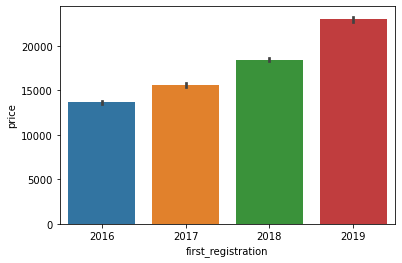

In [68]:
sns.barplot(x="first_registration", y="price", data=data);

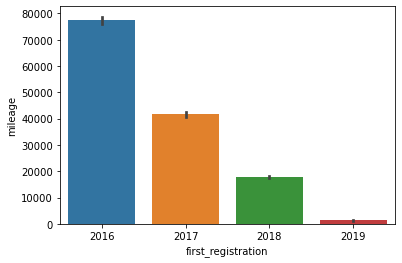

In [69]:
sns.barplot(x="first_registration", y="mileage", data=data);

#### Handling the independent variables *hp* and *kW*

In [70]:
raw_df[["hp", "kW"]].head()

,hp,kW
0,66 kW,NaN
1,141 kW,NaN
2,85 kW,NaN
3,66 kW,NaN
4,66 kW,NaN


In [71]:
raw_df[["hp", "kW"]].isnull().sum()

hp        0
kW    15918
dtype: int64

In [72]:
temp = raw_df["hp"].copy()

In [73]:
temp = temp.apply(lambda row: row.strip(" kW"))

In [74]:
temp.head()

0     66
1    141
2     85
3     66
4     66
Name: hp, dtype: object

In [75]:
#temp = temp.apply(lambda x: int(x) if x.isdigit() else np.NaN)

In [76]:
temp = temp.apply(lambda x: pd.to_numeric(x, errors ='coerce'))

In [77]:
temp[temp < 50].count()

25

In [78]:
temp[temp < 50] = np.NaN

In [79]:
temp.isnull().sum()

113

In [80]:
temp.shape

(15918,)

In [81]:
data["power"] = temp
#data["power"] = pd.to_numeric(data["power"], errors ='coerce')

In [82]:
cond = -(data["power"] > 50)
data[cond].sort_values(by="power")

,price,make,model,mileage,first_registration,age,power
1269,15500,Audi,A1,11284,2018,1,NaN
2500,22750,Audi,A1,10,2019,0,NaN
3913,20440,Audi,A3,24000,2017,2,NaN
4259,18700,Audi,A3,16316,2018,1,NaN
6005,11600,Opel,Astra,73860,2017,2,NaN
6034,11600,Opel,Astra,76010,2017,2,NaN
6946,11900,Opel,Astra,70090,2017,2,NaN
7014,11700,Opel,Astra,79993,2017,2,NaN
7016,11700,Opel,Astra,62384,2017,2,NaN
7018,11700,Opel,Astra,77272,2017,2,NaN


In [83]:
data['power'] = data['power'].fillna(data.groupby('model')['power'].transform('mean'))

In [84]:
data["power"] = data["power"].astype(int)

In [85]:
data["power"].isnull().sum()

0

In [50]: def f(x):    
   ....:  return x[0] + x[1] 

df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)



In [86]:
data.head()

,price,make,model,mileage,first_registration,age,power
0,15770,Audi,A1,56013,2016,3,66
1,14500,Audi,A1,80000,2017,2,141
2,14640,Audi,A1,83450,2016,3,85
3,14500,Audi,A1,73000,2016,3,66
4,16790,Audi,A1,16200,2016,3,66


In [87]:
data.describe()

,price,mileage,first_registration,age,power
count,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000
mean,18019.257193,31935.047619,2017.611195,1.388805,88.555095
std,7385.960648,37090.278586,1.121525,1.121525,26.665229
min,13.000000,0.000000,2016.000000,0.000000,51.000000
25%,12850.000000,1553.750000,2017.000000,0.000000,66.000000
50%,16900.000000,20397.000000,2018.000000,1.000000,85.000000
75%,21900.000000,46899.250000,2019.000000,2.000000,103.000000
max,74600.000000,317000.000000,2019.000000,3.000000,294.000000


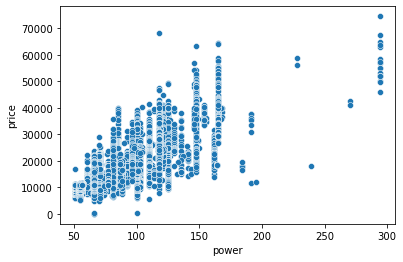

In [88]:
sns.scatterplot(x="power", y="price", data=data);

#### Handling the independent variables *prev_owner* and *Previous Owners*

In [89]:
temp = raw_df["Previous Owners"].copy()

In [90]:
temp.tail()

15914                                                  NaN
15915    [\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100...
15916                     [\n1\n, \n139 g CO2/km (comb)\n]
15917                                                  NaN
15918                                                \n1\n
Name: Previous Owners, dtype: object

In [91]:
temp.isnull().sum()

6640

In [92]:
temp = [item[0] if type(item) == list else item for item in temp]

In [93]:
temp[0:5]

['\n2\n', nan, '\n1\n', '\n1\n', '\n1\n']

In [94]:
temp[-5:]

[nan, '\n1\n', '\n1\n', nan, '\n1\n']

In [95]:
temp = [int(item.strip("\n")) if isinstance(item, str) else item for item in temp]

In [96]:
#temp = [item[0] if type(item) == list else item for item in temp]

In [97]:
temp[0:10]

[2, nan, 1, 1, 1, 1, 1, 1, 1, nan]

In [98]:
temp[-10:]

[nan, 1, 1, nan, nan, nan, 1, 1, nan, 1]

In [99]:
data["prev_owner"] = temp

In [100]:
data[~data["prev_owner"].isnull()].groupby("first_registration")["prev_owner"].mean()

first_registration
2016    1.167621
2017    1.151905
2018    1.021974
2019    0.912599
Name: prev_owner, dtype: float64

In [101]:
data.loc[(data["prev_owner"].isnull()) & (data["first_registration"] == 2019), "prev_owner"] = 0
data.loc[(data["prev_owner"].isnull()) & (data["first_registration"] < 2019), "prev_owner"] = 1

In [102]:
data["prev_owner"] = data["prev_owner"].astype(int)

In [103]:
data.shape

(15918, 8)

In [104]:
data.describe()

,price,mileage,first_registration,age,power,prev_owner
count,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000
mean,18019.257193,31935.047619,2017.611195,1.388805,88.555095,0.871278
std,7385.960648,37090.278586,1.121525,1.121525,26.665229,0.466726
min,13.000000,0.000000,2016.000000,0.000000,51.000000,0.000000
25%,12850.000000,1553.750000,2017.000000,0.000000,66.000000,1.000000
50%,16900.000000,20397.000000,2018.000000,1.000000,85.000000,1.000000
75%,21900.000000,46899.250000,2019.000000,2.000000,103.000000,1.000000
max,74600.000000,317000.000000,2019.000000,3.000000,294.000000,4.000000


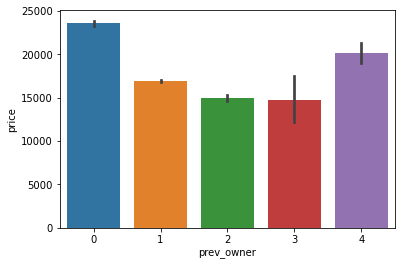

In [105]:
sns.barplot(x="prev_owner", y="price", data=data);

With non NaN values of previous owner, we created a predictive model and compared with the model without previous owner feature. We have seen that the previous owner feature is not contributing to the model performance so there is no reason to try imputing more than 6000 missing values. Infact, imputing it and using in the predictive model resulted no better model where the feature importance of previous owner is lower than the case without impute. We should not forget that we are usually making up values by imputing unless there is a clear direction for such an imputation.

#### Handling the independent variables *vat*

In [106]:
temp = raw_df["vat"].copy()

In [107]:
temp.value_counts()

VAT deductible      10979
Price negotiable      426
Name: vat, dtype: int64

In [108]:
temp.isnull().sum()

4513

In [109]:
data["vat"] = temp

In [110]:
data.groupby(["vat", "model"])["price"].mean()

vat               model   
Price negotiable  A1          16276.432099
                  A3          20653.069307
                  Astra       12610.644444
                  Clio        11857.810811
                  Corsa        9351.853659
                  Espace      24959.647059
                  Insignia    15520.500000
VAT deductible    A1          19630.430101
                  A3          21218.886827
                  Astra       16515.375821
                  Clio        12199.228659
                  Corsa       11699.166148
                  Duster      14611.000000
                  Espace      32070.388985
                  Insignia    22137.912626
Name: price, dtype: float64

In [111]:
data[data.vat.isnull()].groupby(["model"])["price"].mean()

model
A1          17351.150198
A3          20417.125794
Astra       14151.263400
Clio        11621.934699
Corsa        9333.658494
Duster      12002.777778
Espace      27467.994681
Insignia    19635.485915
Name: price, dtype: float64

We decided to use a simple fillna operation with mode of the variable because the variable is not important in predicting the price hence with no critical impact.

In [112]:
data["vat"].fillna(data["vat"].mode()[0], inplace=True) # it will not affect the final model too much

In [113]:
data["vat"].value_counts()

VAT deductible      15492
Price negotiable      426
Name: vat, dtype: int64

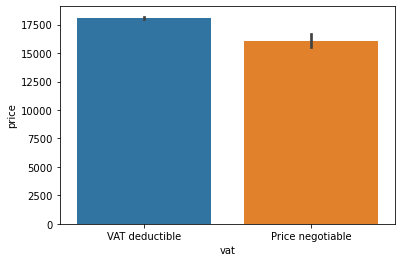

In [114]:
sns.barplot(x="vat", y="price", data=data);

#### Handling the independent variables *body_type*

In [115]:
temp = raw_df["body_type"].copy()

In [116]:
temp.head()

0    Sedans
1    Sedans
2    Sedans
3    Sedans
4    Sedans
Name: body_type, dtype: object

In [117]:
temp.value_counts()

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           55
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [118]:
temp.isnull().sum()

60

In [119]:
data["body_type"] = temp

In [120]:
data["body_type"] = data['body_type'].fillna(data.groupby('model')['body_type'].transform(lambda x: x.mode().iloc[0]))

In [121]:
data.groupby('model')['body_type'].apply(lambda x: x.mode().iloc[0])

model
A1                 Sedans
A3                 Sedans
Astra       Station wagon
Clio               Sedans
Corsa             Compact
Duster           Off-Road
Espace                Van
Insignia    Station wagon
Name: body_type, dtype: object

In [122]:
data["body_type"].value_counts()

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           55
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [123]:
data["body_type"].isnull().sum()

0

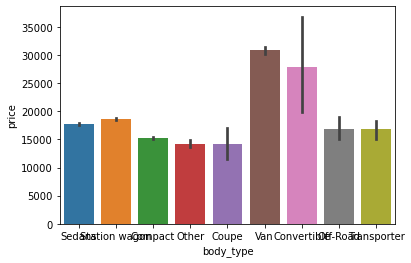

In [124]:
sns.barplot(x="body_type", y="price", data=data);

#### Handling the independent variables *Gearing type*

In [125]:
temp = raw_df["Gearing Type"].copy()

In [126]:
temp.head()

0    [\n, Automatic, \n]
1    [\n, Automatic, \n]
2    [\n, Automatic, \n]
3    [\n, Automatic, \n]
4    [\n, Automatic, \n]
Name: Gearing Type, dtype: object

In [127]:
temp[0]

['\n', 'Automatic', '\n']

In [128]:
temp.isnull().sum()

0

In [129]:
temp = temp.apply(lambda x: x[1])

In [130]:
temp.value_counts()

Manual            8152
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

In [131]:
data["gear"] = temp

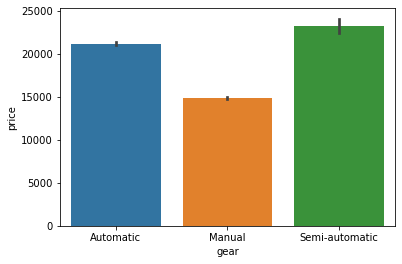

In [132]:
sns.barplot(x="gear", y="price", data=data);

#### Handling the independent variables *Nr. of Doors*

In [133]:
temp = raw_df["Nr. of Doors"].copy()

In [134]:
temp.head()

0    [\n5\n]
1    [\n3\n]
2    [\n4\n]
3    [\n3\n]
4    [\n5\n]
Name: Nr. of Doors, dtype: object

In [135]:
temp.isnull().sum()

212

In [136]:
temp = [int(item[0].strip("\n")) if isinstance(item, list) else item for item in temp]

In [137]:
data["nr_of_doors"] = temp.copy()

In [138]:
data.head()

,price,make,model,mileage,first_registration,age,power,prev_owner,vat,body_type,gear,nr_of_doors
0,15770,Audi,A1,56013,2016,3,66,2,VAT deductible,Sedans,Automatic,5.0
1,14500,Audi,A1,80000,2017,2,141,1,Price negotiable,Sedans,Automatic,3.0
2,14640,Audi,A1,83450,2016,3,85,1,VAT deductible,Sedans,Automatic,4.0
3,14500,Audi,A1,73000,2016,3,66,1,VAT deductible,Sedans,Automatic,3.0
4,16790,Audi,A1,16200,2016,3,66,1,VAT deductible,Sedans,Automatic,5.0


In [139]:
f = lambda x: x.mode().iloc[0]
data["nr_of_doors"] = data["nr_of_doors"].fillna(data.groupby('model')["nr_of_doors"].transform(f))
#data["nr_of_doors"] = data["nr_of_doors"].fillna(data.groupby(['model', 'body_type'])["nr_of_doors"].transform('mean'))

In [140]:
data["nr_of_doors"].apply(np.round).value_counts()

5.0    11786
4.0     3079
3.0      832
2.0      219
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

In [141]:
data.loc[data["nr_of_doors"] == 1, "nr_of_doors"] = 2
data.loc[data["nr_of_doors"] == 7, "nr_of_doors"] = 5

In [142]:
data["nr_of_doors"].value_counts()

5.0    11787
4.0     3079
3.0      832
2.0      220
Name: nr_of_doors, dtype: int64

In [143]:
data["nr_of_doors"] = data["nr_of_doors"].astype(int)

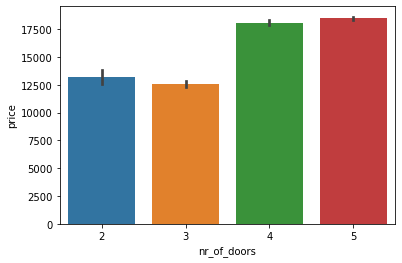

In [144]:
sns.barplot(x="nr_of_doors", y="price", data=data);

#### Handling the independent variables Nr. of Seats¶

In [145]:
temp = raw_df["Nr. of Seats"].copy()

In [146]:
temp.head()

0    [\n5\n]
1    [\n4\n]
2    [\n4\n]
3    [\n4\n]
4    [\n5\n]
Name: Nr. of Seats, dtype: object

In [147]:
temp.isnull().sum()

977

In [148]:
temp = [int(item[0].strip("\n")) if isinstance(item, list) else item for item in temp]

In [149]:
data["nr_of_seats"] = temp.copy()

In [150]:
data["nr_of_seats"].value_counts()

5.0    13335
4.0     1125
7.0      362
2.0      116
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

In [151]:
data["nr_of_seats"] = data["nr_of_seats"].fillna(data.groupby('model')["nr_of_seats"].transform(lambda x: x.mode().iloc[0]))

In [152]:
data["nr_of_seats"].value_counts()

5.0    14312
4.0     1125
7.0      362
2.0      116
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

In [153]:
data.loc[data["nr_of_seats"] == 3, "nr_of_seats"] = 2
data.loc[data["nr_of_seats"] == 6, "nr_of_seats"] = 7

In [154]:
data["nr_of_seats"].value_counts()

5.0    14312
4.0     1125
7.0      364
2.0      117
Name: nr_of_seats, dtype: int64

In [155]:
data["nr_of_seats"] = data["nr_of_seats"].astype(int)

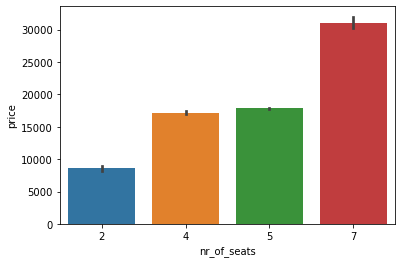

In [156]:
sns.barplot(x="nr_of_seats", y="price", data=data);

#### Handling the independent variables 'Cylinders'

In [157]:
temp = raw_df["Cylinders"].copy()

In [158]:
temp.head()

0    [\n3\n]
1    [\n4\n]
2        NaN
3    [\n3\n]
4    [\n3\n]
Name: Cylinders, dtype: object

In [159]:
temp.isnull().sum()

5679

In [160]:
temp = [int(item[0].strip("\n")) if isinstance(item, list) else item for item in temp]

In [161]:
data["cylinders"] = temp.copy()

In [162]:
data["cylinders"].value_counts(dropna=False)

4.0    8105
NaN    5679
3.0    2104
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: cylinders, dtype: int64

In [163]:
data[data.cylinders == 5].head()

,price,make,model,mileage,first_registration,age,power,prev_owner,vat,body_type,gear,nr_of_doors,nr_of_seats,cylinders
3587,64900,Audi,A3,35000,2018,1,294,1,VAT deductible,Sedans,Semi-automatic,5,5,5.0
3590,62900,Audi,A3,700,2019,0,294,0,VAT deductible,Sedans,Semi-automatic,5,5,5.0
3592,56900,Audi,A3,5200,2018,1,294,1,VAT deductible,Sedans,Semi-automatic,5,5,5.0
3593,58500,Audi,A3,10000,2018,1,294,1,VAT deductible,Sedans,Semi-automatic,5,5,5.0
3595,63900,Audi,A3,10,2019,0,294,1,VAT deductible,Station wagon,Semi-automatic,5,5,5.0


In [164]:
data.loc[data.cylinders < 3 , "cylinders"] = 3
data.loc[data.cylinders > 5, "cylinders"] = 5

In [165]:
data["cylinders"].value_counts(dropna=False)

4.0    8105
NaN    5679
3.0    2107
5.0      27
Name: cylinders, dtype: int64

In [166]:
data.isnull().sum()

price                    0
make                     0
model                    0
mileage                  0
first_registration       0
age                      0
power                    0
prev_owner               0
vat                      0
body_type                0
gear                     0
nr_of_doors              0
nr_of_seats              0
cylinders             5679
dtype: int64

In [167]:
#f = lambda x: round(x.mean(), 0)

data["cylinders"] = data["cylinders"].fillna(data.groupby("model")["cylinders"].transform(lambda x: x.mode().iloc[0]))

In [168]:
data["cylinders"].value_counts(dropna=False)

4.0    12925
3.0     2966
5.0       27
Name: cylinders, dtype: int64

In [169]:
data[data.cylinders.isnull()]

,price,make,model,mileage,first_registration,age,power,prev_owner,vat,body_type,gear,nr_of_doors,nr_of_seats,cylinders


#### Handling the independent variables 'Next Inspection', 'Inspection new'

In [170]:
raw_df[['Next Inspection', 'Inspection new']].head()

,Next Inspection,Inspection new
0,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]"
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,"[\nYes\n, \n109 g CO2/km (comb)\n]"


In [171]:
raw_df[['Next Inspection', 'Inspection new']].isnull().sum()

Next Inspection    12384
Inspection new     11986
dtype: int64

In [172]:
temp = raw_df["Inspection new"]

In [173]:
temp.tail()

15914                                   NaN
15915                                   NaN
15916           [\nYes\n, \nEuro 6d-TEMP\n]
15917                                   NaN
15918    [\nYes\n, \n153 g CO2/km (comb)\n]
Name: Inspection new, dtype: object

In [174]:
temp.isnull().sum()

11986

In [175]:
temp = [item[0].strip("\n") if isinstance(item, list) else item for item in temp]
temp = [item.strip("\n") if isinstance(item, str) else item for item in temp]

In [176]:
data["inspection_new"] = temp.copy()

In [177]:
data["inspection_new"].value_counts(dropna=False)

NaN    11986
Yes     3932
Name: inspection_new, dtype: int64

In [178]:
data["inspection_new"].fillna("-", inplace=True)

In [179]:
data.groupby(["model", "body_type", "first_registration", "inspection_new"]).price.describe()

count          mean  \
model    body_type     first_registration inspection_new                        
A1       Compact       2016               -               128.0  14745.820312   
                                          Yes             106.0  14275.811321   
                       2017               -               115.0  16425.669565   
                                          Yes              46.0  17045.652174   
                       2018               -               150.0  19065.306667   
...                                                         ...           ...   
Insignia Station wagon 2018               -               268.0  21615.932836   
                                          Yes             212.0  22425.792453   
                       2019               -               300.0  32646.903333   
                                          Yes              92.0  33554.010870   
         Van           2018               -                 1.0  20980.000000   

                                                                  std  \
model    body_type     first_registration inspection_new                
A1       Compact       2016               -               1877.292750   
                                          Yes             1923.911230   
                       2017               -               1985.790164   
                                          Yes             2278.592043   
                       2018               -               2836.071257   
...                                                               ...   
Insignia Station wagon 2018               -               1608.680333   
                                          Yes             1604.598556   
                       2019               -               5014.880375   
                                          Yes             4974.443483   
         Van           2018               -                       NaN   

                                                              min       25%  \
model    body_type     first_registration inspection_new                      
A1       Compact       2016               -               10900.0  13500.00   
                                          Yes              9950.0  12922.50   
                       2017               -               10999.0  15450.00   
                                          Yes             12490.0  15610.00   
                       2018               -               14500.0  16490.00   
...                                                           ...       ...   
Insignia Station wagon 2018               -               17500.0  20270.00   
                                          Yes             18480.0  20980.00   
                       2019               -               19900.0  28990.00   
                                          Yes             24845.0  29834.75   
         Van           2018               -               20980.0  20980.00   

                                                              50%       75%  \
model    body_type     first_registration inspection_new                      
A1       Compact       2016               -               14940.0  15492.50   
                                          Yes             13925.0  15443.75   
                       2017               -               15850.0  16890.00   
                                          Yes             15980.0  18367.00   
                       2018               -               18800.0  21949.75   
...                                                           ...       ...   
Insignia Station wagon 2018               -               21495.0  22900.00   
                                          Yes             22885.0  23890.00   
                       2019               -               32995.0  36590.00   
                                          Yes             33990.0  36990.00   
         Van           2018               -               20980.0  20980.00   

In [180]:
data.loc[data["inspection_new"] == "-", "inspection_new"] = "No"

In [181]:
data["inspection_new"].value_counts()

No     11986
Yes     3932
Name: inspection_new, dtype: int64

Too much data is missing. We will not impute or include these features in our data set.

#### Handling the independent variables 'Warranty'

In [182]:
temp = raw_df["Warranty"].copy()

In [183]:
temp.tail()

15914              \n24 months\n
15915       [\n, \n, \nEuro 6\n]
15916    [\n, \n, \n4 (Green)\n]
15917                         \n
15918                        NaN
Name: Warranty, dtype: object

Usually, the warranty and the registration dates must be highly corralated so it does not need to be included (redundancy). Also, significant number of NaN and empty entries exist that prohibits meaningful imputation. 

#### Handling the independent variables *Non-smoking Vehicle*

In [184]:
temp = raw_df["Non-smoking Vehicle"].copy()

In [185]:
temp.head()

0                [\n, \n]
1                     NaN
2                     NaN
3    [\n, \n, \nEuro 6\n]
4                [\n, \n]
Name: Non-smoking Vehicle, dtype: object

No valuable data exist under this feature. To be removed.

#### Handling the independent variables *Body Color*

In [186]:
temp = raw_df["Body Color"].copy()

In [187]:
temp.head()

0    [\n, Black, \n]
1      [\n, Red, \n]
2    [\n, Black, \n]
3    [\n, Brown, \n]
4    [\n, Black, \n]
Name: Body Color, dtype: object

In [188]:
temp = temp.apply(lambda x: x[1] if isinstance(x, list) else x)

In [189]:
temp.value_counts()

Black     3745
Grey      3504
White     3406
Silver    1647
Blue      1431
Red        957
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

In [190]:
temp.isnull().sum()

597

In [191]:
data["body_color"] = temp.copy()

In [192]:
f = lambda x: x.mode().iloc[0]
data["body_color"] = data["body_color"].fillna(data.groupby('model')["body_color"].transform(f))

In [193]:
data["body_color"].isnull().sum()

0

In [194]:
data["body_color"].value_counts()

Black     3957
Grey      3770
White     3525
Silver    1647
Blue      1431
Red        957
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

In [195]:
data["body_color"] = data["body_color"].apply(lambda x: 'other' 
                                              if x in ["Brown", "Green", "Beige", "Yellow", "Violet", "Bronze", "Orange", "Gold"]
                                              else x)

In [196]:
data["body_color"].value_counts()

Black     3957
Grey      3770
White     3525
Silver    1647
Blue      1431
Red        957
other      631
Name: body_color, dtype: int64

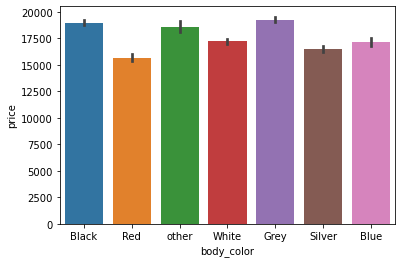

In [197]:
sns.barplot(x="body_color", y="price", data=data);

#### Handling the independent variables *Body Color Original*

In [198]:
temp = raw_df["Body Color Original"].copy()

In [199]:
temp.head()

0             [\nMythosschwarz\n]
1                             NaN
2    [\nmythosschwarz metallic\n]
3                             NaN
4    [\nMythosschwarz Metallic\n]
Name: Body Color Original, dtype: object

There are close to 2000 different original color name without opportunity to generalize or relate to price. Not to be included in the data set.

#### Handling the independent variables *Paint Type*

In [200]:
temp = raw_df["Paint Type"].copy()

In [201]:
temp.head(10)

0    [\nMetallic\n]
1               NaN
2    [\nMetallic\n]
3    [\nMetallic\n]
4    [\nMetallic\n]
5    [\nMetallic\n]
6    [\nMetallic\n]
7    [\nMetallic\n]
8    [\nMetallic\n]
9               NaN
Name: Paint Type, dtype: object

In [202]:
temp = [item[0].strip("\n") if isinstance(item, list) else item for item in temp]

In [203]:
data["paint_type"] = temp.copy()

In [204]:
data["paint_type"].value_counts()

Metallic       9793
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [205]:
data.shape

(15918, 17)

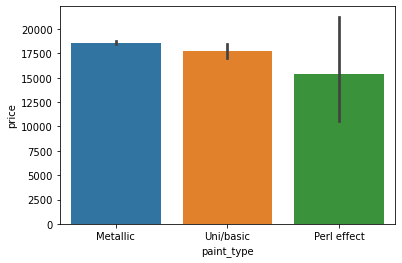

In [206]:
sns.barplot(x="paint_type", y="price", data=data);

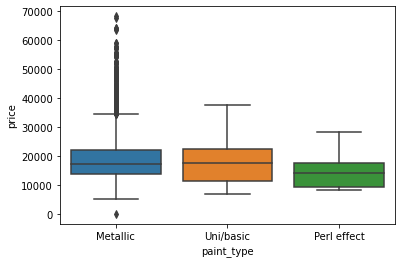

In [207]:
sns.boxplot(x="paint_type", y="price", data=data);

In [208]:
data.loc[data["price"] > 40000, "paint_type"] = "Metallic"
#data.loc[data["paint_type"] == "Perl effect", "paint_type"] = "Metallic"

f = lambda x: x.mode().iloc[0]
data["paint_type"] = data["paint_type"].fillna(data.groupby('model')["paint_type"].transform(f))

In [209]:
data["paint_type"].value_counts()

Metallic       15548
Uni/basic        364
Perl effect        6
Name: paint_type, dtype: int64

In [210]:
data.isnull().sum()

price                 0
make                  0
model                 0
mileage               0
first_registration    0
age                   0
power                 0
prev_owner            0
vat                   0
body_type             0
gear                  0
nr_of_doors           0
nr_of_seats           0
cylinders             0
inspection_new        0
body_color            0
paint_type            0
dtype: int64

In [211]:
raw_df.Type.head()

0    [, Used, , Diesel (Particulate Filter)]
1                       [, Used, , Gasoline]
2    [, Used, , Diesel (Particulate Filter)]
3    [, Used, , Diesel (Particulate Filter)]
4    [, Used, , Diesel (Particulate Filter)]
Name: Type, dtype: object

#### Handling the independent variables *Fuel*

In [212]:
temp = raw_df["Fuel"].copy()

In [213]:
temp.head()

0    [\n, Diesel (Particulate Filter), \n]
1                       [\n, Gasoline, \n]
2    [\n, Diesel (Particulate Filter), \n]
3    [\n, Diesel (Particulate Filter), \n]
4    [\n, Diesel (Particulate Filter), \n]
Name: Fuel, dtype: object

In [214]:
temp = [item[1] if isinstance(item, list) else item for item in temp]

In [215]:
data["fuel"] = temp.copy()

In [216]:
data["fuel"].value_counts()

Diesel (Particulate Filter)                                                                                                       4314
Super 95                                                                                                                          3338
Gasoline                                                                                                                          3175
Diesel                                                                                                                            2984
Super 95 / Regular/Benzine 91                                                                                                      424
Regular/Benzine 91                                                                                                                 354
Super E10 95                                                                                                                       331
Super 95 (Particulate Filter)                          

In [217]:
data["fuel"].isnull().sum()

0

In [218]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others"]
lpg = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
diesel = ["Diesel", "Diesel (Particulate Filter)"]
def get_fuel(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return"LPG"
    elif x in diesel:
        return "Diesel"
    else:
        return x
    
data["fuel"] = data.fuel.apply(get_fuel)
data["fuel"] = data["fuel"].apply(lambda x: "Benzine" if x not in ["Benzine", "Diesel", "LPG"] else x)

In [219]:
data["fuel"].value_counts()

Benzine    8569
Diesel     7298
LPG          51
Name: fuel, dtype: int64

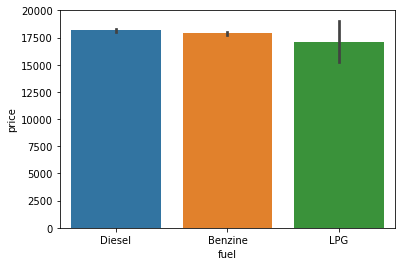

In [220]:
sns.barplot(x="fuel", y="price", data=data);

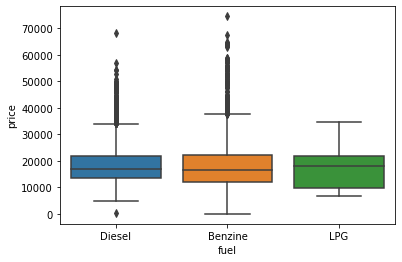

In [221]:
sns.boxplot(x="fuel", y="price", data=data);

#### Handling the independent variables *Type*

In [222]:
temp = raw_df["Type"].copy()

In [223]:
temp.head(10)

0    [, Used, , Diesel (Particulate Filter)]
1                       [, Used, , Gasoline]
2    [, Used, , Diesel (Particulate Filter)]
3    [, Used, , Diesel (Particulate Filter)]
4    [, Used, , Diesel (Particulate Filter)]
5    [, Used, , Diesel (Particulate Filter)]
6    [, Used, , Diesel (Particulate Filter)]
7    [, Used, , Diesel (Particulate Filter)]
8    [, Used, , Diesel (Particulate Filter)]
9                       [, Used, , Gasoline]
Name: Type, dtype: object

In [224]:
temp = [item[1] if isinstance(item, list) else item for item in temp]

In [225]:
data["type"] = temp.copy()

In [226]:
data["type"].isnull().sum()

2

In [227]:
data["type"] = data["type"].fillna(data.groupby('model')["type"].transform(lambda x: x.mode().iloc[0]))


In [228]:
data["type"].value_counts()

Used              11098
New                1650
Pre-registered     1364
Employee's car     1010
Demonstration       796
Name: type, dtype: int64

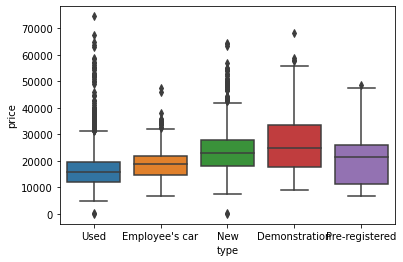

In [229]:
sns.boxplot(x="type", y="price", data=data);

#### Handling the independent variables *Emission Class*

In [230]:
temp = raw_df["Emission Class"].copy()

In [231]:
temp.head()

0    [\nEuro 6\n]
1    [\nEuro 6\n]
2    [\nEuro 6\n]
3    [\nEuro 6\n]
4    [\nEuro 6\n]
Name: Emission Class, dtype: object

In [232]:
temp = [str(item[0]).strip("\n") if isinstance(item, list) else item for item in temp]

In [233]:
data["emission_class"] = temp.copy()

In [234]:
data["emission_class"].value_counts()

Euro 6          10138
Euro 6d-TEMP     1845
[]                607
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [235]:
data.groupby("emission_class")["price"].mean()

emission_class
Euro 4          13655.825000
Euro 5          12472.500000
Euro 6          17121.427500
Euro 6c         16225.842520
Euro 6d         18487.870968
Euro 6d-TEMP    22185.037940
[]              15256.907743
Name: price, dtype: float64

In [236]:
# group 4 and 5 as <6, transform [] as NaN, fillna with mode...

In [237]:
data.loc[data["emission_class"] == "[]", "emission_class"] = np.NaN

In [238]:
data["emission_class"].value_counts()

Euro 6          10138
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [239]:
data["emission_class"].isnull().sum()

3628

In [240]:
data.groupby(['model', 'first_registration'])["emission_class"].apply(lambda x: x.mode())

model     first_registration   
A1        2016                0          Euro 6
          2017                0          Euro 6
          2018                0          Euro 6
          2019                0          Euro 6
A3        2016                0          Euro 6
          2017                0          Euro 6
          2018                0          Euro 6
          2019                0    Euro 6d-TEMP
Astra     2016                0          Euro 6
          2017                0          Euro 6
          2018                0          Euro 6
          2019                0    Euro 6d-TEMP
Clio      2016                0          Euro 6
          2017                0          Euro 6
          2018                0          Euro 6
          2019                0          Euro 6
Corsa     2016                0          Euro 6
          2017                0          Euro 6
          2018                0          Euro 6
          2019                0    Euro 6d-TEMP
Duster  

In [241]:
data.groupby(['model', 'first_registration'])["emission_class"].value_counts()

model     first_registration  emission_class
A1        2016                Euro 6            526
                              Euro 5              4
                              Euro 6d-TEMP        3
                              Euro 6c             2
                              Euro 4              1
          2017                Euro 6            345
                              Euro 5              1
          2018                Euro 6            617
                              Euro 6d-TEMP       11
                              Euro 5              4
          2019                Euro 6            271
                              Euro 6d-TEMP      264
                              Euro 6d             5
A3        2016                Euro 6            695
                              Euro 5              6
                              Euro 6c             2
          2017                Euro 6            592
                              Euro 6d             1
          2018     

In [242]:
data["emission_class"] = data["emission_class"].fillna(data.groupby(['model', 'first_registration'])["emission_class"].transform(lambda x: x.mode().iloc[0]))

In [243]:
data["emission_class"].value_counts()

Euro 6          12890
Euro 6d-TEMP     2719
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             42
Name: emission_class, dtype: int64

#### Handling the independent variables *Displacement*

In [244]:
temp = raw_df["Displacement"].copy()
temp.tail()

15914    [\n1,997 cc\n]
15915    [\n1,798 cc\n]
15916    [\n1,997 cc\n]
15917    [\n1,997 cc\n]
15918    [\n1,798 cc\n]
Name: Displacement, dtype: object

In [245]:
temp.isnull().sum()

496

In [246]:
temp = temp.apply(lambda x: ''.join(re.findall("[0-9]", str(x))) if isinstance(x, list) else x)

In [247]:
temp.isnull().sum()

496

In [248]:
temp.value_counts(dropna=False)

1598     4760
999      2438
1398     1314
1399      749
1229      677
1956      670
1461      595
1490      559
NaN       496
1422      467
1197      353
898       351
1395      320
1968      301
1149      288
1618      212
1798      210
1498      196
1600      130
1248      110
1997      103
1364      102
1400       90
998        72
1500       50
2000       46
1000       40
1          36
1998       25
2480       20
1200       18
1984       18
1397       11
899        11
160         6
929         5
1499        5
997         4
1596        4
139         4
900         4
1599        3
1199        3
1396        3
1495        2
1589        2
1300        2
2           2
995         2
1496        1
890         1
1580        1
1995        1
1333        1
54          1
1533        1
1100        1
1350        1
16000       1
1856        1
1568        1
1896        1
1584        1
996         1
1696        1
1686        1
15898       1
1368        1
140         1
973         1
1239        1
1369  

In [249]:
data["displacement"] = temp.copy()

In [250]:
data["displacement"] = data["displacement"].fillna(data.groupby('model')["displacement"].transform(lambda x: x.mode().iloc[0]))



In [251]:
data["displacement"].value_counts()

1598     5062
999      2467
1398     1388
1399      749
1461      686
1229      677
1956      670
1490      559
1422      467
1197      353
898       351
1395      320
1968      301
1149      288
1618      212
1798      210
1498      196
1600      130
1248      110
1997      103
1364      102
1400       90
998        72
1500       50
2000       46
1000       40
1          36
1998       25
2480       20
1200       18
1984       18
1397       11
899        11
160         6
929         5
1499        5
997         4
1596        4
139         4
900         4
1599        3
1199        3
1396        3
1495        2
1589        2
1300        2
2           2
995         2
1496        1
890         1
1580        1
1995        1
1333        1
54          1
1533        1
1100        1
1350        1
16000       1
1856        1
1568        1
1896        1
1584        1
996         1
1696        1
1686        1
15898       1
1368        1
140         1
973         1
1239        1
1369        1
1390  

In [252]:
data["displacement"] = data["displacement"].astype(int)

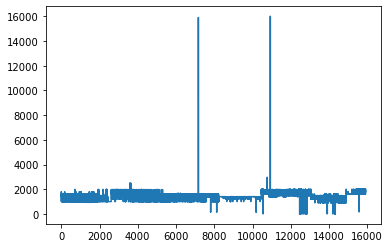

In [253]:
data["displacement"].plot();

In [254]:
data[(data.displacement > 2500) | (data.displacement < 800)].head()

,price,make,model,mileage,first_registration,age,power,prev_owner,vat,body_type,gear,nr_of_doors,nr_of_seats,cylinders,inspection_new,body_color,paint_type,fuel,type,emission_class,displacement
7169,18490,Opel,Astra,22327,2018,1,100,1,VAT deductible,Station wagon,Automatic,5,5,4.0,Yes,other,Metallic,Benzine,Employee's car,Euro 6,15898
7809,23940,Opel,Astra,12,2019,0,110,0,VAT deductible,Sedans,Automatic,5,5,4.0,Yes,Black,Metallic,Benzine,Pre-registered,Euro 6d-TEMP,139
7810,23940,Opel,Astra,12,2019,0,110,0,VAT deductible,Sedans,Automatic,5,5,4.0,Yes,Silver,Metallic,Benzine,Pre-registered,Euro 6d-TEMP,139
7811,23940,Opel,Astra,12,2019,0,110,0,VAT deductible,Sedans,Automatic,5,5,4.0,Yes,Grey,Metallic,Benzine,Pre-registered,Euro 6d-TEMP,139
7812,23940,Opel,Astra,12,2019,0,110,0,VAT deductible,Sedans,Automatic,5,5,4.0,Yes,Blue,Metallic,Benzine,Pre-registered,Euro 6d-TEMP,139


In [255]:
data.loc[(data.displacement > 2500) | (data.displacement < 800), "displacement"] = np.NaN

In [256]:
data.displacement.isnull().sum()

54

In [257]:
data["displacement"] = data["displacement"].fillna(data.groupby('model')["displacement"].transform(lambda x: x.mode().iloc[0]))


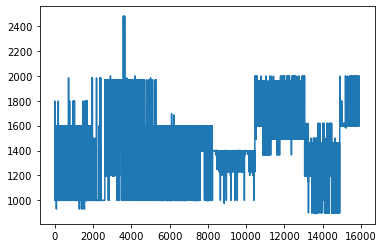

In [258]:
data["displacement"].plot();

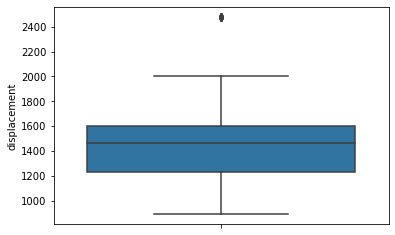

In [259]:
sns.boxplot(y=data.displacement);

#### Handling the independent variables *Consumption*

In [260]:
temp = raw_df["Consumption"].copy()

In [261]:
temp.tail()

15914    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15915    [\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...
15916    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15917    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15918    [[6.8 l/100 km (comb)], [8.7 l/100 km (city)],...
Name: Consumption, dtype: object

In [262]:
temp.isnull().sum()

1906

In [263]:
temp = temp.apply(pd.Series)

In [264]:
temp.head()

,0,1,2,3,4,5,6
0,[3.8 l/100 km (comb)],[4.3 l/100 km (city)],[3.5 l/100 km (country)],NaN,NaN,NaN,NaN
1,[5.6 l/100 km (comb)],[7.1 l/100 km (city)],[4.7 l/100 km (country)],NaN,NaN,NaN,NaN
2,[3.8 l/100 km (comb)],[4.4 l/100 km (city)],[3.4 l/100 km (country)],NaN,NaN,NaN,NaN
3,[3.8 l/100 km (comb)],[4.3 l/100 km (city)],[3.5 l/100 km (country)],NaN,NaN,NaN,NaN
4,[4.1 l/100 km (comb)],[4.6 l/100 km (city)],[3.8 l/100 km (country)],NaN,NaN,NaN,NaN


In [265]:
temp.columns = ['combined', 'city', 'col3', 'col4', 'col5', 'col6', 'col7']

In [266]:
temp.columns

Index(['combined', 'city', 'col3', 'col4', 'col5', 'col6', 'col7'], dtype='object')

In [267]:
temp.tail()

,combined,city,col3,col4,col5,col6,col7
15914,[5.3 l/100 km (comb)],[6.2 l/100 km (city)],[4.7 l/100 km (country)],NaN,NaN,NaN,NaN
15915,\n,7.4 l/100 km (comb),\n,9.2 l/100 km (city),\n,6.3 l/100 km (country),\n
15916,[5.3 l/100 km (comb)],[6.2 l/100 km (city)],[4.7 l/100 km (country)],NaN,NaN,NaN,NaN
15917,[5.3 l/100 km (comb)],[6.2 l/100 km (city)],[4.7 l/100 km (country)],NaN,NaN,NaN,NaN
15918,[6.8 l/100 km (comb)],[8.7 l/100 km (city)],[5.7 l/100 km (country)],NaN,NaN,NaN,NaN


In [268]:
temp.loc[temp.combined == "\n", 'combined'] = temp.city

In [269]:
temp.tail()

,combined,city,col3,col4,col5,col6,col7
15914,[5.3 l/100 km (comb)],[6.2 l/100 km (city)],[4.7 l/100 km (country)],NaN,NaN,NaN,NaN
15915,7.4 l/100 km (comb),7.4 l/100 km (comb),\n,9.2 l/100 km (city),\n,6.3 l/100 km (country),\n
15916,[5.3 l/100 km (comb)],[6.2 l/100 km (city)],[4.7 l/100 km (country)],NaN,NaN,NaN,NaN
15917,[5.3 l/100 km (comb)],[6.2 l/100 km (city)],[4.7 l/100 km (country)],NaN,NaN,NaN,NaN
15918,[6.8 l/100 km (comb)],[8.7 l/100 km (city)],[5.7 l/100 km (country)],NaN,NaN,NaN,NaN


In [270]:
temp = temp.combined
temp.head()

0    [3.8 l/100 km (comb)]
1    [5.6 l/100 km (comb)]
2    [3.8 l/100 km (comb)]
3    [3.8 l/100 km (comb)]
4    [4.1 l/100 km (comb)]
Name: combined, dtype: object

In [271]:
temp = temp.apply(pd.Series)

In [272]:
temp.tail()

,0
15914,5.3 l/100 km (comb)
15915,7.4 l/100 km (comb)
15916,5.3 l/100 km (comb)
15917,5.3 l/100 km (comb)
15918,6.8 l/100 km (comb)


In [273]:
data["consumption"] = temp.copy()

In [274]:
data.tail()

,price,make,model,mileage,first_registration,age,power,prev_owner,vat,body_type,gear,nr_of_doors,nr_of_seats,cylinders,inspection_new,body_color,paint_type,fuel,type,emission_class,displacement,consumption
15914,39950,Renault,Espace,0,2019,0,147,0,VAT deductible,Van,Automatic,5,5,4.0,No,Grey,Metallic,Diesel,New,Euro 6,1997.0,5.3 l/100 km (comb)
15915,39885,Renault,Espace,9900,2019,0,165,1,VAT deductible,Van,Automatic,5,5,4.0,No,Grey,Metallic,Benzine,Used,Euro 6,1798.0,7.4 l/100 km (comb)
15916,39875,Renault,Espace,15,2019,0,146,1,VAT deductible,Van,Automatic,5,7,4.0,Yes,White,Metallic,Diesel,Pre-registered,Euro 6d-TEMP,1997.0,5.3 l/100 km (comb)
15917,39700,Renault,Espace,10,2019,0,147,0,VAT deductible,Van,Automatic,5,7,4.0,No,Grey,Metallic,Diesel,Pre-registered,Euro 6,1997.0,5.3 l/100 km (comb)
15918,40999,Renault,Espace,0,2019,0,165,1,VAT deductible,Van,Automatic,5,5,4.0,Yes,Grey,Metallic,Benzine,Demonstration,Euro 6,1798.0,6.8 l/100 km (comb)


In [275]:
data.loc[~data["consumption"].isnull(), "consumption"]= data.consumption.apply(lambda x: float(str(x).split()[0]))

In [276]:
data.consumption.value_counts(dropna=False)

NaN     2033
5.4      770
3.9      733
4.0      713
5.1      657
4.4      623
5.6      618
4.7      602
3.8      585
4.8      546
5.0      545
4.5      523
5.2      454
4.2      435
4.6      426
4.9      392
5.5      380
5.3      380
3.7      369
5.9      369
4.1      342
5.7      342
6.0      331
4.3      307
3.3      307
3.5      288
6.2      216
3.6      194
6.3      181
6.1      175
5.8      164
6.6      148
6.8      136
3.4      106
6.4       75
3.0       69
7.4       66
6.5       43
6.7       43
7.1       38
10.0      34
6.9       27
3.2       25
8.3       20
7.6       14
7.0       10
3.1        7
7.2        6
7.8        6
8.0        5
51.0       4
8.6        4
7.9        3
8.7        3
1.6        3
7.3        2
8.1        2
40.0       2
38.0       2
0.0        2
9.1        1
43.0       1
7.5        1
13.8       1
55.0       1
54.0       1
1.2        1
32.0       1
33.0       1
50.0       1
1.0        1
46.0       1
11.0       1
Name: consumption, dtype: int64

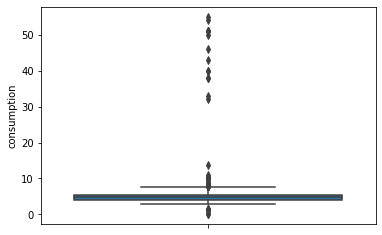

In [277]:
sns.boxplot(y=data.consumption);

In [278]:
data[data.consumption == 32]

,price,make,model,mileage,first_registration,age,power,prev_owner,vat,body_type,gear,nr_of_doors,nr_of_seats,cylinders,inspection_new,body_color,paint_type,fuel,type,emission_class,displacement,consumption
14131,9990,Renault,Clio,68652,2017,2,66,1,VAT deductible,Sedans,Manual,5,5,4.0,No,Grey,Metallic,Diesel,Used,Euro 6,1461.0,32.0


In [279]:
data[data.consumption == 11]

,price,make,model,mileage,first_registration,age,power,prev_owner,vat,body_type,gear,nr_of_doors,nr_of_seats,cylinders,inspection_new,body_color,paint_type,fuel,type,emission_class,displacement,consumption
10513,17990,Opel,Insignia,145000,2016,3,239,1,VAT deductible,Station wagon,Automatic,4,5,4.0,No,Red,Metallic,Benzine,Used,Euro 6,1598.0,11.0


In [280]:
data.groupby(["model", "first_registration"])["consumption"].mean()

model     first_registration
A1        2016                  4.196068
          2017                  4.242037
          2018                  4.213833
          2019                  5.013690
A3        2016                  4.170283
          2017                  4.183687
          2018                  4.419152
          2019                  4.729237
Astra     2016                  4.247045
          2017                  4.221512
          2018                  4.820063
          2019                  5.356460
Clio      2016                  4.233431
          2017                  4.664873
          2018                  5.165936
          2019                  5.086704
Corsa     2016                  5.017877
          2017                  5.222289
          2018                  5.467940
          2019                  5.920441
Duster    2019                  9.727273
Espace    2016                  4.795349
          2017                  5.499270
          2018              

In [281]:
data.loc[(data.consumption > 10) | (data.consumption < 4), "consumption" ] = np.NaN

In [282]:
data["consumption"] = data["consumption"].fillna(data.groupby(["model", "first_registration"])["consumption"].transform(lambda x: x.mode().iloc[0]))

In [283]:
data["consumption"].value_counts(dropna=False)

5.4     2124
4.0     1698
5.1     1043
4.7      885
4.4      871
4.2      870
4.5      834
5.6      618
5.0      615
4.8      598
5.2      540
4.3      494
5.7      450
5.3      446
4.6      426
4.9      392
5.5      380
5.9      369
4.1      342
6.0      331
6.1      261
6.3      224
6.2      216
5.8      164
6.6      148
6.8      136
7.4      104
6.4       75
6.5       43
6.7       43
7.1       38
10.0      36
6.9       27
8.3       20
7.6       14
7.0       10
7.8        6
7.2        6
8.0        5
8.6        4
8.7        3
7.9        3
7.3        2
8.1        2
7.5        1
9.1        1
Name: consumption, dtype: int64

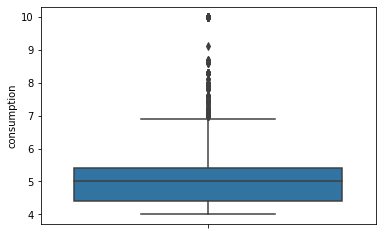

In [284]:
sns.boxplot(y=data.consumption);

In [285]:
data.info

<bound method DataFrame.info of        price     make   model  mileage  first_registration  age  power  \
0      15770     Audi      A1    56013                2016    3     66   
1      14500     Audi      A1    80000                2017    2    141   
2      14640     Audi      A1    83450                2016    3     85   
3      14500     Audi      A1    73000                2016    3     66   
4      16790     Audi      A1    16200                2016    3     66   
...      ...      ...     ...      ...                 ...  ...    ...   
15914  39950  Renault  Espace        0                2019    0    147   
15915  39885  Renault  Espace     9900                2019    0    165   
15916  39875  Renault  Espace       15                2019    0    146   
15917  39700  Renault  Espace       10                2019    0    147   
15918  40999  Renault  Espace        0                2019    0    165   

       prev_owner               vat body_type       gear  nr_of_doors  \
0     

#### Handling the independent variables *CO2 emission*

In [286]:
temp = raw_df["CO2 Emission"].copy()
temp.isnull().sum()

1807

In [287]:
temp.iloc[15909][0]#.split()[0].replace(",", "")

'\n153 g CO2/km (comb)\n'

In [288]:
'\n153 g CO2/km (comb)\n'.split()[0].replace(",", "")

'153'

In [289]:
temp = temp.apply(lambda x: str(x[0]).split()[0].replace(",", "") if type(x) == list else x)

In [290]:
temp.tail(10)

15909     []
15910    153
15911    123
15912    139
15913    153
15914    139
15915    168
15916    139
15917    139
15918    153
Name: CO2 Emission, dtype: object

In [291]:
#temp.replace("[]", np.nan, inplace=True)

In [292]:
temp.value_counts(dropna=False)

NaN      1807
120       740
[]        628
99        545
97        537
104       501
102       477
103       445
114       382
124       372
107       362
108       362
119       361
106       349
128       329
126       282
85        275
118       270
110       266
127       257
117       254
111       237
113       235
109       234
139       224
140       218
129       213
105       202
135       202
92        198
130       180
123       178
150       174
112       171
143       171
95        161
116       157
141       156
98        151
133       145
136       145
137       133
125       132
134       130
145       126
149       117
153       113
147       109
101       105
132       100
115        86
122        83
121        82
138        75
93         66
168        58
142        58
148        48
131        48
154        40
144        40
94         37
146        36
100        36
90         35
151        34
91         31
186        30
152        28
187        26
172        25
82    

In [293]:
temp = pd.to_numeric(temp, errors='coerce')

In [294]:
temp.head()

0     99.0
1    129.0
2     99.0
3     99.0
4    109.0
Name: CO2 Emission, dtype: float64

In [295]:
temp.value_counts(dropna=False)

NaN        2435
120.0       740
99.0        545
97.0        537
104.0       501
102.0       477
103.0       445
114.0       382
124.0       372
107.0       362
108.0       362
119.0       361
106.0       349
128.0       329
126.0       282
85.0        275
118.0       270
110.0       266
127.0       257
117.0       254
111.0       237
113.0       235
109.0       234
139.0       224
140.0       218
129.0       213
105.0       202
135.0       202
92.0        198
130.0       180
123.0       178
150.0       174
112.0       171
143.0       171
95.0        161
116.0       157
141.0       156
98.0        151
133.0       145
136.0       145
137.0       133
125.0       132
134.0       130
145.0       126
149.0       117
153.0       113
147.0       109
101.0       105
132.0       100
115.0        86
122.0        83
121.0        82
138.0        75
93.0         66
168.0        58
142.0        58
148.0        48
131.0        48
154.0        40
144.0        40
94.0         37
146.0        36
100.0   

In [296]:
data["co2"] = temp.copy()

In [297]:
data["co2"] = data["co2"].fillna(data.groupby(["model", "first_registration"])["co2"].transform('mean'))

In [298]:
data["co2"].value_counts(dropna=False)

120.000000      740
99.000000       545
97.000000       537
104.000000      501
102.000000      477
103.000000      445
114.000000      382
124.000000      372
107.000000      362
108.000000      362
119.000000      361
106.000000      349
128.000000      329
126.000000      282
85.000000       275
118.000000      270
110.000000      266
127.000000      257
117.000000      254
111.000000      237
113.000000      235
109.000000      234
139.000000      224
140.000000      218
129.000000      213
135.000000      202
105.000000      202
92.000000       198
130.000000      180
123.000000      178
150.000000      174
112.000000      171
143.000000      171
145.013699      163
95.000000       161
116.000000      157
141.000000      156
126.223464      154
98.000000       151
133.000000      145
136.000000      145
106.026510      139
137.000000      133
125.000000      132
134.000000      130
145.000000      126
109.297376      123
130.363830      119
149.000000      117
153.000000      113


In [299]:
data["co2"].describe()

count    15918.000000
mean       124.051564
std        248.569674
min          0.000000
25%        104.250000
50%        117.000000
75%        130.000000
max      14457.000000
Name: co2, dtype: float64

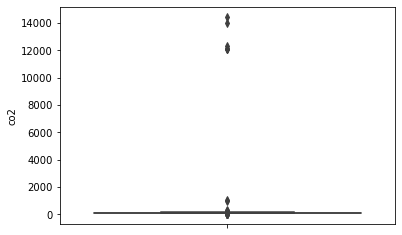

In [300]:
sns.boxplot(y="co2", data=data);

In [301]:
data.groupby(["model", "first_registration"])["co2"].mean()

model     first_registration
A1        2016                  101.357268
          2017                  103.182065
          2018                  102.686303
          2019                  109.297376
A3        2016                  106.026510
          2017                  106.838602
          2018                  110.736034
          2019                  113.513298
Astra     2016                  138.841849
          2017                  107.009823
          2018                  154.752381
          2019                  126.223464
Clio      2016                  103.813665
          2017                  106.245509
          2018                  118.730000
          2019                  114.895775
Corsa     2016                  155.074928
          2017                  122.680000
          2018                  126.903494
          2019                  136.621861
Duster    2019                  171.666667
Espace    2016                  122.757202
          2017           

In [302]:
data.loc[(data.co2 > 200) | (data.co2 < 80), "co2"] = np.NaN

In [303]:
data.co2.isnull().sum()

23

In [304]:
data["co2"] = data["co2"].fillna(data.groupby(["model", "first_registration"])["co2"].transform('mean'))

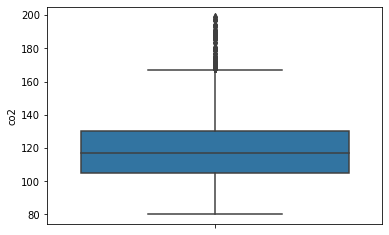

In [305]:
sns.boxplot(y="co2", data=data);

#### Handling the independent variables *Gears*

In [306]:
temp = raw_df["Gears"].copy()
temp.head(20)

0         NaN
1     [\n7\n]
2         NaN
3     [\n6\n]
4         NaN
5         NaN
6         NaN
7     [\n7\n]
8     [\n7\n]
9     [\n7\n]
10    [\n7\n]
11        NaN
12        NaN
13        NaN
14    [\n7\n]
15    [\n7\n]
16    [\n5\n]
17    [\n7\n]
18    [\n7\n]
19    [\n7\n]
Name: Gears, dtype: object

In [307]:
temp.isnull().sum()

4711

In [308]:
temp = temp.apply(lambda x: int(x[0].split("\n")[1]) if isinstance(x, list) else x)

In [309]:
temp.head(20)

0     NaN
1     7.0
2     NaN
3     6.0
4     NaN
5     NaN
6     NaN
7     7.0
8     7.0
9     7.0
10    7.0
11    NaN
12    NaN
13    NaN
14    7.0
15    7.0
16    5.0
17    7.0
18    7.0
19    7.0
Name: Gears, dtype: float64

In [310]:
temp.value_counts(dropna=False)

6.0     5822
NaN     4711
5.0     3239
7.0     1908
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: Gears, dtype: int64

In [311]:
data["gears"] = temp.copy()

In [312]:
data.loc[((data["gears"] == 8) & (data["model"] != "Insignia")) | (data["gears"] < 5) | (data["gears"] > 8), "gears"] = np.NaN

In [313]:
data["gears"].isnull().sum()

4728

In [314]:
#data["gears"] = data["gears"].fillna(data.groupby(["model", "body_type"])["gears"].transform(lambda x: x.mode().iloc[0]))

#f = lambda x: round(x.mean(), 0)

data["gears"] = data["gears"].fillna(data.groupby("model")["gears"].transform(lambda x: x.mode().iloc[0]))



In [315]:
data["gears"].isnull().sum()

0

In [316]:
data["gears"].value_counts()

6.0    8419
5.0    5370
7.0    1908
8.0     221
Name: gears, dtype: int64

In [317]:
dt = data["gears"].value_counts()

In [318]:
dt = pd.DataFrame(dt)

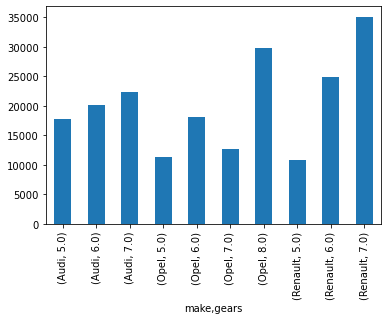

In [319]:
data.groupby(["make", "gears"])["price"].mean().plot(kind="bar");

#### Handling the independent variables *Comfort & Convenience*

In [320]:
temp = raw_df["Comfort & Convenience"].copy()
temp.head()

0    [Air conditioning, Armrest, Automatic climate ...
1    [Air conditioning, Automatic climate control, ...
2    [Air conditioning, Cruise control, Electrical ...
3    [Air suspension, Armrest, Auxiliary heating, E...
4    [Air conditioning, Armrest, Automatic climate ...
Name: Comfort & Convenience, dtype: object

In [321]:
temp[0:1]

0    [Air conditioning, Armrest, Automatic climate ...
Name: Comfort & Convenience, dtype: object

In [322]:
temp = [",".join(item) if type(item) == list else item for item in temp]

In [323]:
data["comfort"] = temp.copy()

data["comfort"].str.get_dummies(sep=",").add_prefix('cc ')

,cc Air conditioning,cc Air suspension,cc Armrest,cc Automatic climate control,cc Auxiliary heating,cc Cruise control,cc Electric Starter,cc Electric tailgate,cc Electrical side mirrors,cc Electrically adjustable seats,cc Electrically heated windshield,cc Heads-up display,cc Heated steering wheel,cc Hill Holder,cc Keyless central door lock,cc Leather seats,cc Leather steering wheel,cc Light sensor,cc Lumbar support,cc Massage seats,cc Multi-function steering wheel,cc Navigation system,cc Panorama roof,cc Park Distance Control,cc Parking assist system camera,cc Parking assist system self-steering,cc Parking assist system sensors front,cc Parking assist system sensors rear,cc Power windows,cc Rain sensor,cc Seat heating,cc Seat ventilation,cc Split rear seats,cc Start-stop system,cc Sunroof,cc Tinted windows,cc Wind deflector,cc Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [324]:
data.shape

(15918, 25)

In [325]:
data = data.join(data["comfort"].str.get_dummies(sep=",").add_prefix('cc '))
data.drop(["comfort"], axis=1, inplace=True)

In [326]:
data.shape

(15918, 62)

In [327]:
data.isnull().sum()

price                                     0
make                                      0
model                                     0
mileage                                   0
first_registration                        0
age                                       0
power                                     0
prev_owner                                0
vat                                       0
body_type                                 0
gear                                      0
nr_of_doors                               0
nr_of_seats                               0
cylinders                                 0
inspection_new                            0
body_color                                0
paint_type                                0
fuel                                      0
type                                      0
emission_class                            0
displacement                              0
consumption                               0
co2                             

#### Handling the independent variables *Entertainment & Media*

In [328]:
temp = raw_df["Entertainment & Media"].copy()
temp.head()

0    [Bluetooth, Hands-free equipment, On-board com...
1    [Bluetooth, Hands-free equipment, On-board com...
2                             [MP3, On-board computer]
3    [Bluetooth, CD player, Hands-free equipment, M...
4    [Bluetooth, CD player, Hands-free equipment, M...
Name: Entertainment & Media, dtype: object

In [329]:
temp = [",".join(item) if type(item) == list else item for item in temp]

In [330]:
data["entertainment"] = temp.copy()

data["entertainment"].str.get_dummies(sep=",").add_prefix('em ')

,em Bluetooth,em CD player,em Digital radio,em Hands-free equipment,em MP3,em On-board computer,em Radio,em Sound system,em Television,em USB
0,1,0,0,1,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,0,0
2,0,0,0,0,1,1,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15914,1,0,1,1,0,1,1,0,0,1
15915,1,0,1,1,0,0,1,0,0,1
15916,1,0,0,1,0,1,1,0,0,0
15917,1,0,1,0,0,0,1,0,0,1


In [331]:
data.shape

(15918, 63)

In [332]:
data = data.join(data["entertainment"].str.get_dummies(sep=",").add_prefix('em '))
data.drop(["entertainment"], axis=1, inplace=True)

In [333]:
data.shape

(15918, 72)

#### Handling the independent variables *Extras*

In [334]:
temp = raw_df["Extras"].copy()
temp.head()

0    [Alloy wheels, Catalytic Converter, Voice Cont...
1    [Alloy wheels, Sport seats, Sport suspension, ...
2                        [Alloy wheels, Voice Control]
3           [Alloy wheels, Sport seats, Voice Control]
4    [Alloy wheels, Sport package, Sport suspension...
Name: Extras, dtype: object

In [335]:
temp = [",".join(item) if type(item) == list else item for item in temp]

In [336]:
data["extras"] = temp.copy()

data["extras"].str.get_dummies(sep=",").add_prefix('ex ')

,ex Alloy wheels,ex Cab or rented Car,ex Catalytic Converter,ex Handicapped enabled,ex Right hand drive,ex Roof rack,ex Shift paddles,ex Ski bag,ex Sliding door,ex Sport package,ex Sport seats,ex Sport suspension,ex Touch screen,ex Trailer hitch,ex Tuned car,ex Voice Control,ex Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15915,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [337]:
data.shape

(15918, 73)

In [338]:
data = data.join(data["extras"].str.get_dummies(sep=",").add_prefix('ex '))
data.drop(["extras"], axis=1, inplace=True)

In [339]:
data.shape

(15918, 89)

#### Handling the independent variables *Safety & Security*

In [340]:
temp = raw_df["Safety & Security"].copy()
temp.head()

0    [ABS, Central door lock, Daytime running light...
1    [ABS, Central door lock, Central door lock wit...
2    [ABS, Central door lock, Daytime running light...
3    [ABS, Alarm system, Central door lock with rem...
4    [ABS, Central door lock, Driver-side airbag, E...
Name: Safety & Security, dtype: object

In [341]:
temp[0:1][0]

['ABS',
 'Central door lock',
 'Daytime running lights',
 'Driver-side airbag',
 'Electronic stability control',
 'Fog lights',
 'Immobilizer',
 'Isofix',
 'Passenger-side airbag',
 'Power steering',
 'Side airbag',
 'Tire pressure monitoring system',
 'Traction control',
 'Xenon headlights']

In [342]:
temp = [",".join(item) if type(item) == list else item for item in temp]

In [343]:
temp[0:1]

['ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights']

In [344]:
data["safety_security"] = temp.copy()

data["safety_security"].str.get_dummies(sep=",").add_prefix('ss ')

,ss ABS,ss Adaptive Cruise Control,ss Adaptive headlights,ss Alarm system,ss Blind spot monitor,ss Central door lock,ss Central door lock with remote control,ss Daytime running lights,ss Driver drowsiness detection,ss Driver-side airbag,ss Electronic stability control,ss Emergency brake assistant,ss Emergency system,ss Fog lights,ss Head airbag,ss Immobilizer,ss Isofix,ss LED Daytime Running Lights,ss LED Headlights,ss Lane departure warning system,ss Night view assist,ss Passenger-side airbag,ss Power steering,ss Rear airbag,ss Side airbag,ss Tire pressure monitoring system,ss Traction control,ss Traffic sign recognition,ss Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


In [345]:
data.shape

(15918, 90)

In [346]:
data = data.join(data["safety_security"].str.get_dummies(sep=",").add_prefix('ss '))
data.drop(["safety_security"], axis=1, inplace=True)

In [347]:
data.shape

(15918, 118)

#### Handling the independent variables *description*

In [348]:
temp = raw_df["description"].copy()
temp.head()

0    [\n, Sicherheit:,  , Deaktivierung für Beifahr...
1    [\nLangstreckenfahrzeug daher die hohe Kilomet...
2    [\n, Fahrzeug-Nummer: AM-95365,  , Ehem. UPE 2...
3    [\nAudi A1: , - 1e eigenaar , - Perfecte staat...
4    [\n, Technik & Sicherheit:, Xenon plus, Klimaa...
Name: description, dtype: object

#### Handling the independent variables *short_description*

In [349]:
temp = raw_df["short_description"].copy()
temp.head()

0          Sportback 1.4 TDI S-tronic Xenon Navi Klima
1                                       1.8 TFSI sport
2    Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
3                              1.4 TDi Design S tronic
4    Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
Name: short_description, dtype: object

#### Handling the independent variables *Weight*

In [350]:
temp = raw_df["Weight"]
temp.head()

0    [\n1,220 kg\n]
1    [\n1,255 kg\n]
2               NaN
3    [\n1,195 kg\n]
4               NaN
Name: Weight, dtype: object

In [351]:
temp.isnull().sum()

6973

In [352]:
temp = temp.apply(lambda x: int(str(x[0].strip("\n").replace(",", "").strip(" kg"))) if isinstance(x, list) else x)

In [353]:
temp.head()

0    1220.0
1    1255.0
2       NaN
3    1195.0
4       NaN
Name: Weight, dtype: float64

In [354]:
data["weight"] = temp.copy()

In [355]:
#data.weight = data.weight.fillna(data.groupby(["model", "body_type"])["weight"].transform('mean'))
data.weight = data.weight.fillna(data.groupby("model")["weight"].transform('mean'))
#data["gears"] = data["gears"].fillna(data.groupby("model")["gears"].transform(lambda x: x.mode().iloc[0]))

In [356]:
data.weight.tail(99)

15820    1840.000000
15821    1840.000000
15822    1647.000000
15823    1647.000000
15824    1608.000000
15825    1647.000000
15826    1729.388401
15827    1608.000000
15828    1647.000000
15829    1840.000000
15830    1624.000000
15831    1647.000000
15832    1729.388401
15833    1621.000000
15834    1647.000000
15835    1840.000000
15836    1975.000000
15837    1734.000000
15838    1840.000000
15839    1708.000000
15840    1840.000000
15841    1729.388401
15842    1729.388401
15843    1729.388401
15844    1840.000000
15845    1733.000000
15846    1729.388401
15847    1875.000000
15848    1765.000000
15849    1765.000000
15850    1765.000000
15851    1729.388401
15852    1729.388401
15853    1840.000000
15854    1659.000000
15855    1729.388401
15856    1729.388401
15857    1765.000000
15858    1840.000000
15859    1685.000000
15860    1729.388401
15861    1624.000000
15862    1708.000000
15863    1729.388401
15864    1609.000000
15865    1840.000000
15866    1729.388401
15867    1585

In [357]:
data.weight.isnull().sum()

34

In [358]:
data[data.weight.isnull()].head() # There is no weight data on Renault Duster. Hence no mode calculation during fillna.

,price,make,model,mileage,first_registration,age,power,prev_owner,vat,body_type,gear,nr_of_doors,nr_of_seats,cylinders,inspection_new,body_color,paint_type,fuel,type,emission_class,displacement,consumption,co2,gears,cc Air conditioning,cc Air suspension,cc Armrest,cc Automatic climate control,cc Auxiliary heating,cc Cruise control,cc Electric Starter,cc Electric tailgate,cc Electrical side mirrors,cc Electrically adjustable seats,cc Electrically heated windshield,cc Heads-up display,cc Heated steering wheel,cc Hill Holder,cc Keyless central door lock,cc Leather seats,cc Leather steering wheel,cc Light sensor,cc Lumbar support,cc Massage seats,cc Multi-function steering wheel,cc Navigation system,cc Panorama roof,cc Park Distance Control,cc Parking assist system camera,cc Parking assist system self-steering,cc Parking assist system sensors front,cc Parking assist system sensors rear,cc Power windows,cc Rain sensor,cc Seat heating,cc Seat ventilation,cc Split rear seats,cc Start-stop system,cc Sunroof,cc Tinted windows,cc Wind deflector,cc Windshield,em Bluetooth,em CD player,em Digital radio,em Hands-free equipment,em MP3,em On-board computer,em Radio,em Sound system,em Television,em USB,ex Alloy wheels,ex Cab or rented Car,ex Catalytic Converter,ex Handicapped enabled,ex Right hand drive,ex Roof rack,ex Shift paddles,ex Ski bag,ex Sliding door,ex Sport package,ex Sport seats,ex Sport suspension,ex Touch screen,ex Trailer hitch,ex Tuned car,ex Voice Control,ex Winter tyres,ss ABS,ss Adaptive Cruise Control,ss Adaptive headlights,ss Alarm system,ss Blind spot monitor,ss Central door lock,ss Central door lock with remote control,ss Daytime running lights,ss Driver drowsiness detection,ss Driver-side airbag,ss Electronic stability control,ss Emergency brake assistant,ss Emergency system,ss Fog lights,ss Head airbag,ss Immobilizer,ss Isofix,ss LED Daytime Running Lights,ss LED Headlights,ss Lane departure warning system,ss Night view assist,ss Passenger-side airbag,ss Power steering,ss Rear airbag,ss Side airbag,ss Tire pressure monitoring system,ss Traction control,ss Traffic sign recognition,ss Xenon headlights,weight
14894,13250,Renault,Duster,0,2019,0,77,0,VAT deductible,Off-Road,Automatic,5,5,4.0,No,Black,Uni/basic,Benzine,New,Euro 4,1998.0,10.0,150.0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN
14895,16033,Renault,Duster,0,2019,0,77,0,VAT deductible,Off-Road,Automatic,5,5,4.0,No,Black,Uni/basic,Benzine,New,Euro 4,1998.0,10.0,150.0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN
14896,16033,Renault,Duster,101,2019,0,77,0,VAT deductible,Off-Road,Automatic,5,5,4.0,No,Black,Uni/basic,Benzine,Used,Euro 4,1998.0,10.0,150.0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN
14897,16033,Renault,Duster,0,2019,0,77,0,VAT deductible,Off-Road,Automatic,5,5,4.0,No,Black,Uni/basic,Benzine,New,Euro 4,1998.0,10.0,150.0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN
14898,16033,Renault,Duster,101,2019,0,77,0,VAT deductible,Off-Road,Automatic,5,5,4.0,No,Black,Uni/basic,Benzine,Used,Euro 4,1998.0,10.0,150.0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN


In [359]:
data.loc[data.weight.isnull(), "weight"] = 1264

In [360]:
data.weight = data.weight.apply(lambda x: int(round(x, 0)))

In [361]:
data.weight.head()

0    1220
1    1255
2    1229
3    1195
4    1229
Name: weight, dtype: int64

#### Handling the independent variables *Drive chain*

In [362]:
temp = raw_df["Drive chain"]
temp.head()

0    [\nfront\n]
1    [\nfront\n]
2    [\nfront\n]
3            NaN
4    [\nfront\n]
Name: Drive chain, dtype: object

In [363]:
temp.isnull().sum()

6858

In [364]:
temp = temp.apply(lambda x: x[0].strip("\n") if isinstance(x, list) else x)

In [365]:
temp.tail()

15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: Drive chain, dtype: object

In [366]:
data["drive_chain"] = temp.copy()

In [367]:
data.drive_chain = data.drive_chain.fillna(data.groupby("model")["drive_chain"].transform(lambda x: x.mode().iloc[0]))

In [368]:
data.drive_chain.value_counts(dropna=False)

front    15711
4WD        203
rear         4
Name: drive_chain, dtype: int64

In [369]:
data[data.drive_chain == "rear"]

,price,make,model,mileage,first_registration,age,power,prev_owner,vat,body_type,gear,nr_of_doors,nr_of_seats,cylinders,inspection_new,body_color,paint_type,fuel,type,emission_class,displacement,consumption,co2,gears,cc Air conditioning,cc Air suspension,cc Armrest,cc Automatic climate control,cc Auxiliary heating,cc Cruise control,cc Electric Starter,cc Electric tailgate,cc Electrical side mirrors,cc Electrically adjustable seats,cc Electrically heated windshield,cc Heads-up display,cc Heated steering wheel,cc Hill Holder,cc Keyless central door lock,cc Leather seats,cc Leather steering wheel,cc Light sensor,cc Lumbar support,cc Massage seats,cc Multi-function steering wheel,cc Navigation system,cc Panorama roof,cc Park Distance Control,cc Parking assist system camera,cc Parking assist system self-steering,cc Parking assist system sensors front,cc Parking assist system sensors rear,cc Power windows,cc Rain sensor,cc Seat heating,cc Seat ventilation,cc Split rear seats,cc Start-stop system,cc Sunroof,cc Tinted windows,cc Wind deflector,cc Windshield,em Bluetooth,em CD player,em Digital radio,em Hands-free equipment,em MP3,em On-board computer,em Radio,em Sound system,em Television,em USB,ex Alloy wheels,ex Cab or rented Car,ex Catalytic Converter,ex Handicapped enabled,ex Right hand drive,ex Roof rack,ex Shift paddles,ex Ski bag,ex Sliding door,ex Sport package,ex Sport seats,ex Sport suspension,ex Touch screen,ex Trailer hitch,ex Tuned car,ex Voice Control,ex Winter tyres,ss ABS,ss Adaptive Cruise Control,ss Adaptive headlights,ss Alarm system,ss Blind spot monitor,ss Central door lock,ss Central door lock with remote control,ss Daytime running lights,ss Driver drowsiness detection,ss Driver-side airbag,ss Electronic stability control,ss Emergency brake assistant,ss Emergency system,ss Fog lights,ss Head airbag,ss Immobilizer,ss Isofix,ss LED Daytime Running Lights,ss LED Headlights,ss Lane departure warning system,ss Night view assist,ss Passenger-side airbag,ss Power steering,ss Rear airbag,ss Side airbag,ss Tire pressure monitoring system,ss Traction control,ss Traffic sign recognition,ss Xenon headlights,weight,drive_chain
11031,12900,Opel,Insignia,76000,2016,3,100,1,VAT deductible,Station wagon,Manual,5,5,4.0,No,White,Metallic,Diesel,Used,Euro 6,1598.0,4.1,109.0,6.0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,0,0,1664,rear
11456,18990,Opel,Insignia,17887,2017,2,125,1,VAT deductible,Sedans,Automatic,5,5,4.0,No,Red,Metallic,Benzine,Used,Euro 6,1598.0,6.7,159.0,6.0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,1,0,1,1613,rear
12089,18950,Opel,Insignia,24987,2018,1,125,1,VAT deductible,Station wagon,Manual,5,5,4.0,Yes,Grey,Metallic,Diesel,Used,Euro 6,1956.0,5.8,152.0,6.0,1,0,1,1,0,1,0,1,1,1,0,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,1,1,0,0,1589,rear
14611,10490,Renault,Clio,27700,2018,1,55,1,VAT deductible,Sedans,Manual,5,5,4.0,No,Grey,Metallic,Diesel,Used,Euro 6,1461.0,4.0,104.0,5.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1162,rear


In [370]:
data.loc[data.drive_chain == "rear", "drive_chain"] = "front"

In [371]:
data.drive_chain.value_counts(dropna=False)

front    15715
4WD        203
Name: drive_chain, dtype: int64

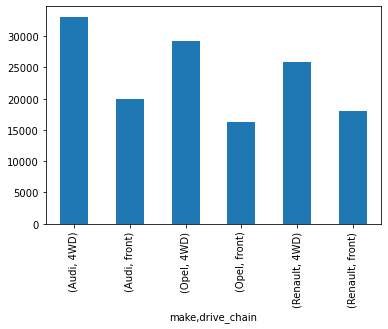

In [372]:
data.groupby(["make", "drive_chain"])["price"].mean().plot(kind="bar");

#### Handling the independent variables *Upholstery*

In [373]:
temp = raw_df["Upholstery"].copy()
temp.tail()

15914                          NaN
15915                  [\nCloth\n]
15916    [\nFull leather, Black\n]
15917           [\nPart leather\n]
15918    [\nFull leather, Brown\n]
Name: Upholstery, dtype: object

In [374]:
temp.isnull().sum()

3720

In [375]:
temp = temp.apply(lambda x: x[0].strip("\n") if isinstance(x, list) else x)

In [376]:
temp.isnull().sum()

3720

In [377]:
temp.tail()

15914                    NaN
15915                  Cloth
15916    Full leather, Black
15917           Part leather
15918    Full leather, Brown
Name: Upholstery, dtype: object

In [378]:
temp.value_counts()

Cloth, Black           5820
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Part leather, Grey      116
Full leather, Brown     116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Full leather, Beige      36
Velour, Black            36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Brown                    12
Cloth, Blue              12
Cloth, White              8
Velour, Grey              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Beige                     3
Part leather, Red         3
alcantara           

In [379]:
str("Full leather, Brown".split(",")[1]).strip(" ")

'Brown'

In [380]:
type(temp.iloc[0])

str

In [381]:
def get_up_type(x):
    if type(x) == str:
        if "," in x:
            up_type = x.split(",")[0]
            if up_type in ["Full leather", "Part leather", "Cloth", "Velour", "Alcantra", "Other"]:
                return up_type
            else:
                return np.NaN
        else:
            if x in ["Full leather", "Part leather", "Cloth", "Velour", "Alcantra", "Other"]:
                return x
            else:
                return np.NaN
    else:
        return x

In [382]:
def get_up_color(x):
    if type(x) == str:
        if "," in x:
            up_color = str(x.split(",")[1]).strip(" ")
            if up_color in ["Black", "Grey", "Beige", "Brown", "Other"]:
                return up_color
            else:
                return np.NaN
        else:
            if x in ["Black", "Grey", "Beige", "Brown", "Other"]:
                return x
            else:
                return np.NaN
    else:
        return x

In [383]:
temp_up_type = temp.apply(lambda x: get_up_type(x))

In [384]:
temp_up_color = temp.apply(lambda x: get_up_color(x))

In [385]:
temp_up_type.tail()

15914             NaN
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: Upholstery, dtype: object

In [386]:
temp_up_color.tail()

15914      NaN
15915      NaN
15916    Black
15917      NaN
15918    Brown
Name: Upholstery, dtype: object

In [387]:
data["upholstery_type"] = temp_up_type.copy()
data["upholstery_color"] = temp_up_color.copy()

In [388]:
data["upholstery_type"].value_counts(dropna=False)

Cloth           8422
NaN             4560
Part leather    1499
Full leather    1009
Other            368
Velour            60
Name: upholstery_type, dtype: int64

In [389]:
data["upholstery_color"].value_counts(dropna=False)

Black    8200
NaN      5065
Grey     1376
Other    1016
Brown     207
Beige      54
Name: upholstery_color, dtype: int64

In [390]:
data.upholstery_type = data.upholstery_type.fillna(data.groupby("model")["upholstery_type"].transform(lambda x: x.mode().iloc[0]))
data.upholstery_color = data.upholstery_color.fillna(data.groupby("model")["upholstery_color"].transform(lambda x: x.mode().iloc[0]))

In [391]:
data["upholstery_type"].value_counts(dropna=False)

Cloth           12605
Part leather     1499
Full leather     1386
Other             368
Velour             60
Name: upholstery_type, dtype: int64

In [392]:
data["upholstery_color"].value_counts(dropna=False)

Black    13249
Grey      1392
Other     1016
Brown      207
Beige       54
Name: upholstery_color, dtype: int64

In [394]:
data.shape

(15918, 122)

In [395]:
data.head()

,price,make,model,mileage,first_registration,age,power,prev_owner,vat,body_type,gear,nr_of_doors,nr_of_seats,cylinders,inspection_new,body_color,paint_type,fuel,type,emission_class,displacement,consumption,co2,gears,cc Air conditioning,cc Air suspension,cc Armrest,cc Automatic climate control,cc Auxiliary heating,cc Cruise control,cc Electric Starter,cc Electric tailgate,cc Electrical side mirrors,cc Electrically adjustable seats,cc Electrically heated windshield,cc Heads-up display,cc Heated steering wheel,cc Hill Holder,cc Keyless central door lock,cc Leather seats,cc Leather steering wheel,cc Light sensor,cc Lumbar support,cc Massage seats,cc Multi-function steering wheel,cc Navigation system,cc Panorama roof,cc Park Distance Control,cc Parking assist system camera,cc Parking assist system self-steering,cc Parking assist system sensors front,cc Parking assist system sensors rear,cc Power windows,cc Rain sensor,cc Seat heating,cc Seat ventilation,cc Split rear seats,cc Start-stop system,cc Sunroof,cc Tinted windows,cc Wind deflector,cc Windshield,em Bluetooth,em CD player,em Digital radio,em Hands-free equipment,em MP3,em On-board computer,em Radio,em Sound system,em Television,em USB,ex Alloy wheels,ex Cab or rented Car,ex Catalytic Converter,ex Handicapped enabled,ex Right hand drive,ex Roof rack,ex Shift paddles,ex Ski bag,ex Sliding door,ex Sport package,ex Sport seats,ex Sport suspension,ex Touch screen,ex Trailer hitch,ex Tuned car,ex Voice Control,ex Winter tyres,ss ABS,ss Adaptive Cruise Control,ss Adaptive headlights,ss Alarm system,ss Blind spot monitor,ss Central door lock,ss Central door lock with remote control,ss Daytime running lights,ss Driver drowsiness detection,ss Driver-side airbag,ss Electronic stability control,ss Emergency brake assistant,ss Emergency system,ss Fog lights,ss Head airbag,ss Immobilizer,ss Isofix,ss LED Daytime Running Lights,ss LED Headlights,ss Lane departure warning system,ss Night view assist,ss Passenger-side airbag,ss Power steering,ss Rear airbag,ss Side airbag,ss Tire pressure monitoring system,ss Traction control,ss Traffic sign recognition,ss Xenon headlights,weight,drive_chain,upholstery_type,upholstery_color
0,15770,Audi,A1,56013,2016,3,66,2,VAT deductible,Sedans,Automatic,5,5,3.0,Yes,Black,Metallic,Diesel,Used,Euro 6,1422.0,4.2,99.0,5.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1220,front,Cloth,Black
1,14500,Audi,A1,80000,2017,2,141,1,Price negotiable,Sedans,Automatic,3,4,4.0,No,Red,Metallic,Benzine,Used,Euro 6,1798.0,5.6,129.0,7.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1255,front,Cloth,Grey
2,14640,Audi,A1,83450,2016,3,85,1,VAT deductible,Sedans,Automatic,4,4,3.0,No,Black,Metallic,Diesel,Used,Euro 6,1598.0,4.2,99.0,5.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1229,front,Cloth,Black
3,14500,Audi,A1,73000,2016,3,66,1,VAT deductible,Sedans,Automatic,3,4,3.0,No,other,Metallic,Diesel,Used,Euro 6,1422.0,4.2,99.0,6.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1195,front,Cloth,Black
4,16790,Audi,A1,16200,2016,3,66,1,VAT deductible,Sedans,Automatic,5,5,3.0,Yes,Black,Metallic,Diesel,Used,Euro 6,1422.0,4.1,109.0,5.0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1229,front,Cloth,Black


### Variable summary

- 'url', removed, not valuable
- 'make_model', removed, redundant
- 'short_description', removed, redundant
- 'body_type', cleaned, included
- 'price', included
- 'vat', cleaned, included
- 'km', cleaned, included
- 'registration', cleaned, included
- 'prev_owner', removed, redundant
- 'kW', removed, redundant, too many NaN
- 'hp', cleaned, renamed as power, included
- 'Type', cleaned, included
- 'Previous Owners', cleaned, included
- 'Next Inspection', removed, too many NaN
- 'Inspection new', cleaned, included
- 'Warranty', removed, redundant, many NaN
- 'Full Service', removed, no value information, too many NaN
- 'Non-smoking Vehicle', removed, too many NaN
- 'null', removed, too many NaN
- 'Make', cleaned, included,
- 'Model', cleaned, included
- 'Offer Number', removed, no value information
- 'First Registration', removed, redundant
- 'Body Color', cleaned, included
- 'Paint Type', cleaned, included
- 'Body Color Original', removed, no value information
- 'Upholstery', removed, no value information
- 'Body', removed, redundant
- 'Nr. of Doors', cleaned, included
- 'Nr. of Seats', cleaned, included
- 'Model Code', removed, too many NaN
- 'Gearing Type', cleaned, included
- 'Displacement', cleaned, included
- 'Cylinders', cleaned, included
- 'Weight', removed, no value information
- 'Drive chain', removed, no value information
- 'Fuel', cleaned, included
- 'Consumption', cleaned, included (combined consumption only) 
- 'CO2 Emission', cleaned, included
- 'Emission Class', cleaned, included
- 'Comfort & Convenience', cleaned, included
- 'Entertainment & Media', cleaned, included
- 'Extras', cleaned, included
- 'Safety & Security', cleaned, included
- 'description', removed, redundant
- 'Emission Label', removed, too many NaN
- 'Gears', cleaned, included
- 'Country version', removed, too many NaN
- 'Electricity consumption', removed, too many NaN
- 'Last Service Date', removed, too many NaN
- 'Other Fuel Types', removed, too many NaN
- 'Availability', removed, too many NaN
- 'Last Timing Belt Service Date', removed, too many NaN
- 'Available from', removed, too many NaN
